In [31]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


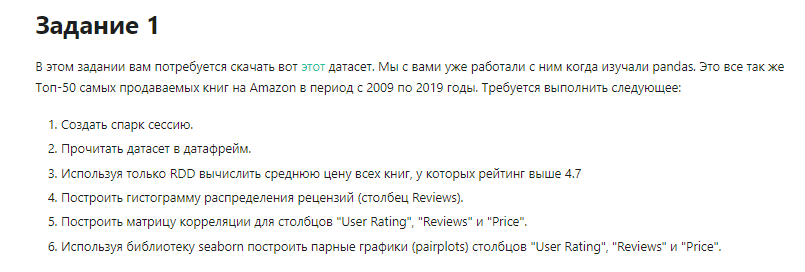

 average book price is 10.69832402234637
             user_rating   reviews     price
user_rating     1.000000 -0.001729 -0.133086
reviews        -0.001729  1.000000 -0.109182
price          -0.133086 -0.109182  1.000000


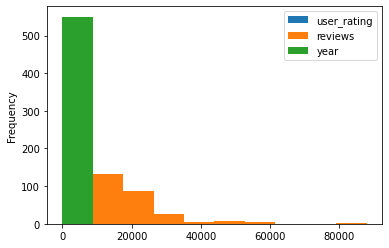

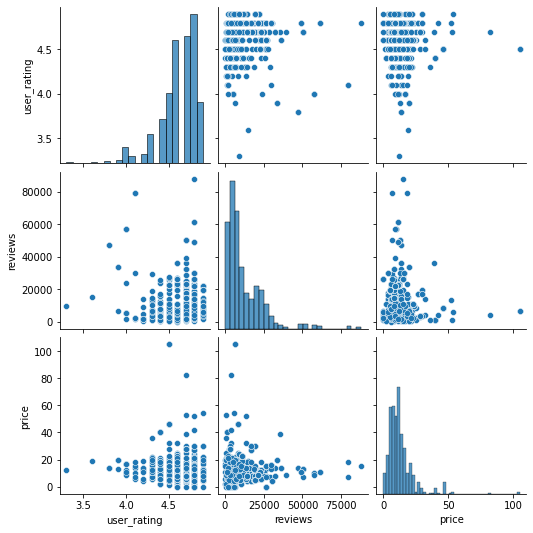

In [292]:
import pyspark
import seaborn as sns
# file loaded in content folder
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType

spark_session = SparkSession.builder.master("local[1]").appName("DZ6").getOrCreate()

df = spark_session.read.csv("bestsellers with categories.csv")
#rdd = spark_session.sparkContext.textFile("bestsellers with categories.csv")
#print(type(df))
df = df.withColumn("_c2", df["_c2"].cast(FloatType()))
df = df.withColumn("_c3", df["_c3"].cast(IntegerType()))
df = df.withColumn("_c4", df["_c4"].cast(IntegerType()))
df = df.withColumn("_c5", df["_c5"].cast(IntegerType()))
selected_books = df.filter(df._c2 > 4.7)

#df.show()
result1=selected_books.select(selected_books["_c4"]).rdd.flatMap(lambda x: (x, )).toDF()
result1.collect()
result1 = result1.withColumn("_c4", result1["_c4"].cast(IntegerType()))
total_price = result1.rdd.reduce(lambda a, b: a + b)

total_price_value = 0
for i in total_price:
  total_price_value+=i
total_price_value = total_price_value/ len(total_price)

print(f" average book price is {total_price_value}")

pd_df = df.toPandas()
#print(pd_df.columns)
pd_df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
pd_df = pd_df[1:]
#print(pd_df.head())

pd_df.plot(x="price", kind="hist");
corr_pd_df=pd_df[["user_rating", "reviews", "price"]]
print(corr_pd_df.corr())

ax=sns.pairplot(corr_pd_df)



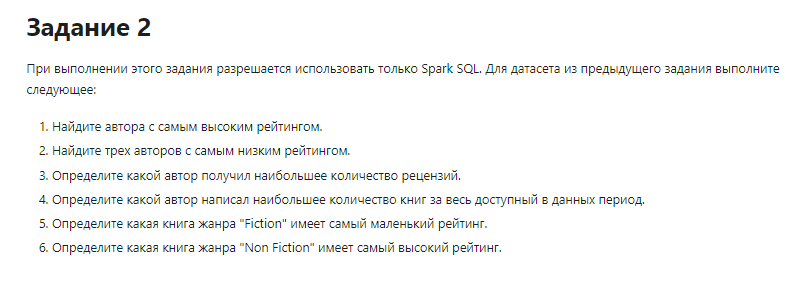

from pyspark.sql.functions import mean, stddev, max

In [153]:
# number 1
from pyspark.sql.functions import mean, stddev, max , min
df.select(max('_c2')).show()
pd_df['user_rating'].max()

+--------+
|max(_c2)|
+--------+
|     4.9|
+--------+



4.9

In [193]:
# number 2
from pyspark.sql.functions import col, asc,desc
df.select("_c1", "_c2").sort(col("_c2").asc()).limit(4).show()

+------------+----+
|         _c1| _c2|
+------------+----+
|      Author|null|
|J.K. Rowling| 3.3|
|  Harper Lee| 3.6|
|   E L James| 3.8|
+------------+----+



In [235]:
# number 3
rev = df.groupBy("_c1").sum("_c3")
rev.select("_c1", "sum(_c3)").sort(col("sum(_c3)").desc()).limit(1).show()


+---------------+--------+
|            _c1|sum(_c3)|
+---------------+--------+
|Suzanne Collins|  278329|
+---------------+--------+



In [264]:
# number 4
books_number = df.groupBy("_c1").agg({"_c2":"count"}).sort(col("count(_c2)").desc()).limit(1).show()


+-----------+----------+
|        _c1|count(_c2)|
+-----------+----------+
|Jeff Kinney|        12|
+-----------+----------+



In [289]:
# number 5
books_fiction_map = df.select(col("_c0"), col("_c1"), col("_c2"), col("_c6")).filter(col("_c6")=="Fiction")
books_fiction = books_fiction_map.sort(col("_c2").asc()).limit(2).show()


+--------------------+------------+---+-------+
|                 _c0|         _c1|_c2|    _c6|
+--------------------+------------+---+-------+
|  The Casual Vacancy|J.K. Rowling|3.3|Fiction|
|Go Set a Watchman...|  Harper Lee|3.6|Fiction|
+--------------------+------------+---+-------+



In [288]:
# number 6
books_non_fiction_map = df.select(col("_c0"), col("_c1"), col("_c2"), col("_c6")).filter(col("_c6")=="Non Fiction")
books_fiction = books_non_fiction_map.sort(col("_c2").desc()).limit(2).show()

+--------------------+------------------+---+-----------+
|                 _c0|               _c1|_c2|        _c6|
+--------------------+------------------+---+-----------+
|Hamilton: The Rev...|Lin-Manuel Miranda|4.9|Non Fiction|
|Humans of New Yor...|   Brandon Stanton|4.9|Non Fiction|
+--------------------+------------------+---+-----------+



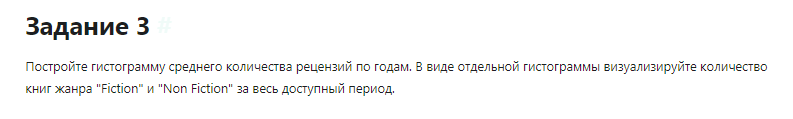

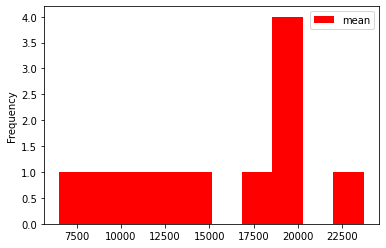

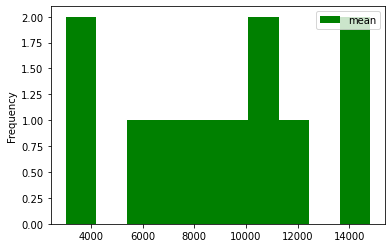

In [395]:
import pandas as pd
data = pd_df.groupby(['year', 'genre']).agg({"reviews":["mean"]})

data=data.reset_index()
data.columns = data.columns.droplevel()
data.columns = ['year', 'genre', 'mean']

data_fict = data[data['genre']=="Fiction"]

data_fict.plot(x='year', y='mean', kind="hist", color="red")

data_non_fict = data[data['genre']=="Non Fiction"]
data_non_fict.plot(x='year', y='mean', kind="hist", color="green")